In [35]:
import pymc as pm
import arviz as az

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%config InlineBackend.figure_format = "svg"
sns.set_theme()

In [3]:
# keys: 112 major, 36 minor. The order doesn't matter
keys = np.zeros(148)
keys[:112] = 1
keys

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
with pm.Model() as model:
    theta = pm.Uniform("theta", 0, 1)
    pm.Bernoulli("keys", p=theta, observed=keys)

In [5]:
with model:
    idata = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Axes: title={'center': 'theta'}>

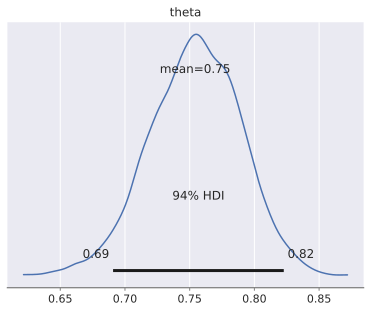

In [6]:
az.plot_posterior(idata)

In [7]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [8]:
idata.posterior["theta"].to_numpy()

array([[0.80220913, 0.69164306, 0.75593251, ..., 0.76426612, 0.76675732,
        0.77445977],
       [0.73402233, 0.74367462, 0.73022814, ..., 0.73681754, 0.73468928,
        0.77634692]])

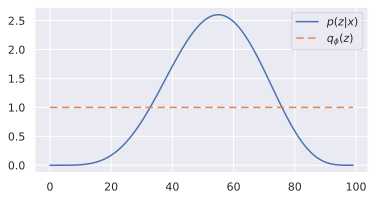

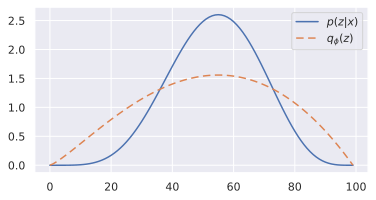

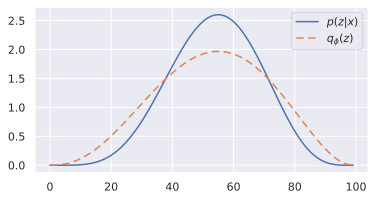

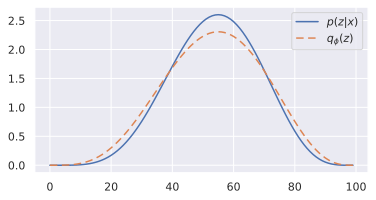

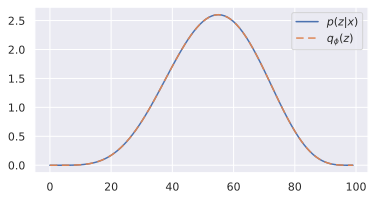

In [99]:
n_steps = 5
#cmap = sns.color_palette("flare", as_cmap=True).resampled(n_steps)
for i, (a, b) in enumerate(zip(np.linspace(1,6,n_steps), np.linspace(1,5,n_steps))):
    fig, ax = plt.subplots(figsize=(6,3))
    sns.lineplot(stats.beta(6, 5).pdf(np.linspace(0,1,100)), ax=ax, label="$p(z|x)$")
    sns.lineplot(stats.beta(a, b).pdf(np.linspace(0,1,100)), ax=ax, dashes=[5,3], label="$q_ϕ(z)$")
    fig.savefig(f"img/vi_step{i+1}.svg")